# Partie 3 : Modélisation

## Section 1 : Analyses préliminaires

Afin d'expliquer l'origine des différences de valorisations entre les entreprises européennes et américaines, on peut regarder l'impact de résultats internes à l'entreprises et de critères relatifs à l'analyse par le marché .

In [29]:
pip install statsmodels


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install seaborn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [32]:
chemin_fichier = 'data/df_eurostoxx_clean.csv'
df_eurostoxx_clean = pd.read_csv(chemin_fichier)
df_eurostoxx_clean.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661,NaN
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952,NaN
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846,-0.952381
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296,-13.942308
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231,-32.402235


In [33]:
chemin_fichier = 'data/df_sp500_clean.csv'
df_sp500_clean = pd.read_csv(chemin_fichier)
df_sp500_clean.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,NaN
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,5.276382
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,0.715990
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,5.213270
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,NaN


In [34]:
print(f"Nombre d'observations S&P 500 : {len(df_sp500_clean)}")
print(f"Nombre d'observations Eurostoxx : {len(df_eurostoxx_clean)}")

Nombre d'observations S&P 500 : 1501
Nombre d'observations Eurostoxx : 1206


Il convient de créer un nouveau data frame contenant toutes les informations pour mener la régressions linéaires

In [35]:
df_eurostoxx_clean.isna().sum()

Ticker                          0
YahooTicker                     0
Nom                             0
Zone                            0
AnneeFiscale                    0
DateRapport                     0
Sector                          0
Industry                        0
Country                         0
Beta                            0
MarketCapitalizationBN          0
SharesOutstandingMn             0
PER_calcule                     0
ROE_calcule                     0
ROA_calcule                     0
DebtToEquity_calcule            0
EPS                             0
EOD_Close_Price                 0
NetIncomeBN                     0
TotalRevenueBN                  0
TotalEquityBN                   0
TotalAssetsBN                   0
TotalDebtBN                     0
Dividendes_Annuels              0
Annual_Volume_Traded_BN         0
%MargeNette                     0
%Gearing                        0
%PayOut                         0
Croissance de l'EPS (en %)    359
dtype: int64

In [36]:
df_analyse = pd.concat([df_sp500_clean,df_eurostoxx_clean], ignore_index = True)
df_analyse = df_analyse.drop("Croissance de l'EPS (en %)", axis = 1)
df_analyse.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.210,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.254,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.240,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.289,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,99.803,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748


In [37]:
print(f"Nombre d'observations S&P 500 et STX : {len(df_analyse)}")

Nombre d'observations S&P 500 et STX : 2707


In [38]:
df_analyse.isna().sum()

Ticker                     0
YahooTicker                0
Nom                        0
Zone                       0
AnneeFiscale               0
DateRapport                0
Sector                     0
Industry                   0
Country                    0
Beta                       0
MarketCapitalizationBN     0
SharesOutstandingMn        0
PER_calcule                0
ROE_calcule                0
ROA_calcule                0
DebtToEquity_calcule       0
EPS                        0
EOD_Close_Price            0
NetIncomeBN                0
TotalRevenueBN             0
TotalEquityBN              0
TotalAssetsBN              0
TotalDebtBN                0
Dividendes_Annuels         0
Annual_Volume_Traded_BN    0
%MargeNette                0
%Gearing                   0
%PayOut                    0
dtype: int64

Les informations des deux data frame ont bien été récuperées dans df_analyse. Pour commencer la régression linéaire, on va determiner l'impact de la dummy variable est_US qui vaut 1 si la zone de l'entreprise est US, en faisant une régression simple. 

In [39]:
df_analyse['Est_US'] = np.where(df_analyse['Zone'] == 'USA', 1, 0)
df_analyse.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Est_US
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,1
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,1
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,1
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,1
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,1


Maintenant que la variable Est_US a bien été définie on peut procéder à la définition du modèle 

In [40]:
import statsmodels.formula.api as smf

#Définir la formule du modèle
modele_formule_simple = """
PER_calcule ~ Est_US
"""
# Crée un sous-ensemble propre pour cette régression simple
df_simple_reg = df_analyse[['PER_calcule', 'Est_US']].copy()

# Ajustement (fitting) du modèle
try:
    modele_simple = smf.ols(formula=modele_formule_simple, data=df_simple_reg).fit()
    
    # 4. Affichage des résultats
    print("\n--- Résultat de la Régression Simple (Écart Brut) ---")
    print(modele_simple.summary())

except Exception as e:
    # Cette erreur ne devrait plus apparaître si la formule est définie
    print(f"Une erreur s'est produite lors de l'ajustement du modèle : {e}")


--- Résultat de la Régression Simple (Écart Brut) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     145.2
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.30e-32
Time:                        15:12:16   Log-Likelihood:                -10176.
No. Observations:                2707   AIC:                         2.036e+04
Df Residuals:                    2705   BIC:                         2.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

On remarque que le R^2 de la régression est d'environ 5.1%, ce qui est très faible.
De plus, le coefficient associé à la variable binaire Est_US est égal à 4.8548, ce qui signifie que le PER moyen des entreprises du S&P500 est en moyenne supérieur de 4.8548 par rapport au PER des entreprises de l'Eurostoxx. On remarque que la p-valeur vaut 0 ce qui permet de conclure que le modèle est globalement significatif. 

On peut également ajouter d'autres élements à la régression linéaire, commençons par des données opérationnelles liées à l'activité de l'entreprise. On ne considérera pas la croissance l'EPS car les lignes pour 2021 contiennent des NA et ne seraient pas considerées dans la regression.

In [41]:
# Préparation du DataFrame pour le modèle multiple
# Copie du DataFrame utilisé pour la première régression linéaire 
df_reg_final = df_analyse.copy()

# Convertir les pourcentages en décimaux pour la régression

#df_reg_final["%MargeNette"] = df_reg_final["%MargeNette"]/100
#df_reg_final["%PayOut"] = df_reg_final["%PayOut"]/100
#df_reg_final["%Gearing"] = df_reg_final["%Gearing"]/100


# Définir la liste complète des colonnes à utiliser À QUOI SERT CETTE PARTIE ?
colonnes_reg_finales = [
    'PER_calcule', 'Est_US', 'ROE_calcule', 'Beta', 
    '%Gearing', 'MarketCapitalizationBN', 
    '%MargeNette', '%PayOut'
]

print(f"\nDataFrame prêt pour le modèle complet : {len(df_reg_final)} observations restantes après nettoyage.")


DataFrame prêt pour le modèle complet : 2707 observations restantes après nettoyage.


In [42]:
modele_formule_complet_final = """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%Gearing") + 
              MarketCapitalizationBN + 
              Q("%MargeNette") + 
              Q("%PayOut")
"""

# Ajustement (fitting) du modèle sur le DataFrame nettoyé 'df_reg_final'
modele_complet_final = smf.ols(formula=modele_formule_complet_final, data=df_reg_final).fit()

# Affichage des résultats
print("\n--- Résultat de la Régression Multiple ---")
print(modele_complet_final.summary())


--- Résultat de la Régression Multiple ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     35.75
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           4.73e-48
Time:                        15:12:16   Log-Likelihood:                -10127.
No. Observations:                2707   AIC:                         2.027e+04
Df Residuals:                    2699   BIC:                         2.032e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Le R^2 de la régression est encore faible, ce qui indique que les données étudiées ne permettent d'expliquer que 8% de la variation du PER. 
On remarque une augmentation du coefficient associé à la variable Est_US par rapport à la regression linéaire simple. 
Le ROE et le gearing sont significatifs à 10 et 5% respectivement contrairement aux autres variables qui sont significatives à 1%. 
On note également un problème de multicolinéarité potentiel

In [43]:
#Testons la multicolinéarité des variables utilisées dans le modèle 
# Sélection des variables explicatives

# Calcul de la matrice de corrélation
matrice_corr = df_reg_final[colonnes_reg_finales].corr()
print(matrice_corr)



                        PER_calcule    Est_US  ROE_calcule      Beta  \
PER_calcule                1.000000  0.225716     0.010702  0.127347   
Est_US                     0.225716  1.000000     0.013570  0.230404   
ROE_calcule                0.010702  0.013570     1.000000  0.008116   
Beta                       0.127347  0.230404     0.008116  1.000000   
%Gearing                   0.004464 -0.008884     0.877750 -0.003509   
MarketCapitalizationBN     0.087633  0.097175     0.037671  0.012591   
%MargeNette               -0.118511  0.002715     0.017578  0.065756   
%PayOut                    0.056468 -0.086500     0.011531 -0.106066   

                        %Gearing  MarketCapitalizationBN  %MargeNette  \
PER_calcule             0.004464                0.087633    -0.118511   
Est_US                 -0.008884                0.097175     0.002715   
ROE_calcule             0.877750                0.037671     0.017578   
Beta                   -0.003509                0.012591   

On peut utiliser seaborn pour une meilleure visibilité des corrélations

<Axes: >

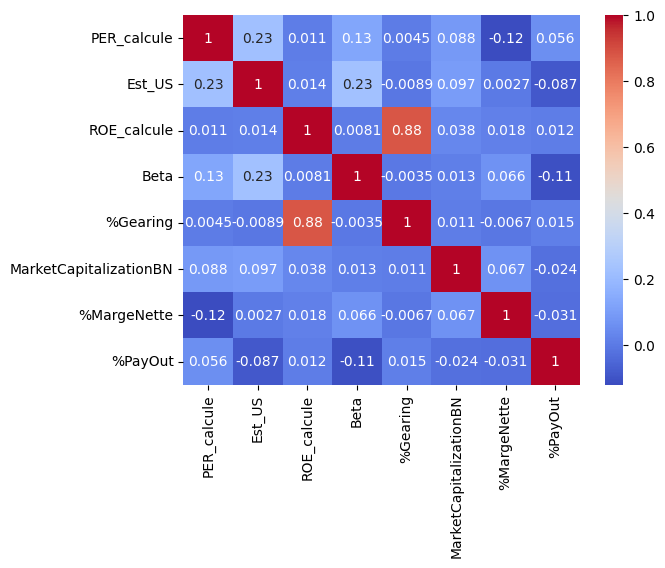

In [44]:
import seaborn as sns
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm')

On remarque que le ROE_calcule et le Gearing sont fortement corrélés. On choisit de retirer le Gearing plutôt que le ROE qui est un indicateur de performance fondamental 

In [45]:
modele_formule_complet_final_2 = """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              MarketCapitalizationBN + 
              Q("%MargeNette") + 
              Q("%PayOut")
"""

# Ajustement (fitting) du modèle sur le DataFrame nettoyé 'df_reg_final'
modele_complet_final_2 = smf.ols(formula=modele_formule_complet_final_2, data=df_reg_final).fit()

# Affichage des résultats
print("\n--- Résultat de la Régression Multiple ---")
print(modele_complet_final_2.summary())


--- Résultat de la Régression Multiple ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     41.71
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           7.07e-49
Time:                        15:12:16   Log-Likelihood:                -10127.
No. Observations:                2707   AIC:                         2.027e+04
Df Residuals:                    2700   BIC:                         2.031e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

On remarque que le R^2 reste identique, le coefficient lié à la marge nette est négatif ce qui est contre intuitif : une marge nette plus élevée devrait avoir un impact positif sur le PER.
On peut remplacer la capitalisation boursière par d'autres données de marché en utilisant le data frame Damodaran 

In [47]:
chemin_fichier = 'data/country_risk_premiums.csv'
df_damodaran = pd.read_csv(chemin_fichier)
df_damodaran.head(20)   

,Country,Adj. Default Spread,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate,Moody's rating
0,Abu Dhabi,0.49,4.99,0.66,15.00,Aa2
1,Albania,3.56,9.13,4.80,15.00,Ba3
2,Algeria,2.98,8.35,4.02,15.00,NR
3,Andorra (Principality of),1.58,6.46,2.13,18.98,Baa1
4,Angola,6.44,13.01,8.68,25.00,B3
5,Anguilla,6.01,12.44,8.11,25.23,NR
6,Antigua & Barbuda,6.01,12.43,8.10,25.23,NR
7,Argentina,11.88,20.35,16.02,35.00,Ca
8,Armenia,3.56,9.13,4.80,18.00,Ba3
9,Aruba,2.18,7.26,2.93,25.00,Baa3


In [48]:
#Affichons tous les Pays du data frame Damodaran 
print("\nListe des pays dans le data frame Damodaran:")
print(df_damodaran['Country'].unique())


Liste des pays dans le data frame Damodaran:
['Abu Dhabi' 'Albania' 'Algeria' 'Andorra               (Principality of)'
 'Angola' 'Anguilla' 'Antigua &               Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bolivia' 'Bosnia and               Herzegovina' 'Botswana' 'Brazil'
 'British Virgin               Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Channel               Islands' 'Chile' 'China' 'Colombia'
 'Congo               (Democratic Republicof)'
 'Congo               (Republic of)' 'Cook Islands' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican               Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Ethiopia' 'Falkland               Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar'

In [49]:
print(df_analyse['Country'].unique())

['United States' 'Bermuda' 'Ireland' 'Switzerland' 'United Kingdom'
 'Canada' 'Netherlands' 'Singapore' 'Germany' 'Italy' 'Sweden' 'Belgium'
 'France' 'Spain' 'Austria' 'Luxembourg' 'Poland' 'China' 'Finland'
 'Norway' 'Denmark' 'Mexico']


In [50]:
# Uniformisation des noms de pays dans les deux DataFrames

# On supprime les espaces invisibles et on remplace les doubles espaces par un seul 
df_reg_final['Country'] = df_reg_final['Country'].str.strip()
df_damodaran['Country'] = df_damodaran['Country'].str.strip()
df_reg_final['Country'] = df_reg_final['Country'].str.replace('\s+', ' ', regex=True)
df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) 

# Rendre la colonne 'Country' l'index pour faciliter la jointure
df_damodaran.set_index('Country', inplace=True) 

# Sélection des colonnes pertinentes
colonnes_marche = ['Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate']
df_damodaran = df_damodaran[colonnes_marche]

In [51]:
# Jointure et Nettoyage des NaN 

df_fusion = pd.merge(
    df_reg_final, 
    df_damodaran, 
    left_on='Country', 
    right_index=True, 
    how='left' 
)


print(f"\nDataFrame après jointure et nettoyage des pays non trouvés : {len(df_fusion)} observations.")




DataFrame après jointure et nettoyage des pays non trouvés : 2707 observations.


In [52]:
df_fusion.isna().sum()

Ticker                     0
YahooTicker                0
Nom                        0
Zone                       0
AnneeFiscale               0
DateRapport                0
Sector                     0
Industry                   0
Country                    0
Beta                       0
MarketCapitalizationBN     0
SharesOutstandingMn        0
PER_calcule                0
ROE_calcule                0
ROA_calcule                0
DebtToEquity_calcule       0
EPS                        0
EOD_Close_Price            0
NetIncomeBN                0
TotalRevenueBN             0
TotalEquityBN              0
TotalAssetsBN              0
TotalDebtBN                0
Dividendes_Annuels         0
Annual_Volume_Traded_BN    0
%MargeNette                0
%Gearing                   0
%PayOut                    0
Est_US                     0
Equity Risk Premium        0
Country Risk Premium       0
Corporate Tax Rate         0
dtype: int64

In [53]:
df_fusion.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Est_US,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.729,0.776,0.407757,19.148599,50.640193,19.497487,1,4.33,0.0,25.0
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.769,1.065,0.427283,18.311916,52.196041,25.417661,1,4.33,0.0,25.0
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.735,0.911,0.461257,18.147227,46.792130,21.587678,1,4.33,0.0,25.0
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,3.390,0.956,0.431039,19.800307,57.477111,21.531532,1,4.33,0.0,25.0
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,132.480,0.910,22.065504,25.309641,261.446164,14.796748,1,4.33,0.0,25.0


In [54]:
# Lancement de la Régression Macro-Financière 

import statsmodels.formula.api as smf

modele_formule_macro = """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%MargeNette") + 
              Q("%PayOut") + 
              Q("Country Risk Premium") + 
              Q("Corporate Tax Rate")+
              Q("Equity Risk Premium")
"""

modele_macro = smf.ols(formula=modele_formule_macro, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_macro.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     38.21
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           2.08e-51
Time:                        15:14:57   Log-Likelihood:                -10119.
No. Observations:                2707   AIC:                         2.025e+04
Df Residuals:                    2699   BIC:                         2.030e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

On a encore un problème de multicolinéarité et le R^2 reste faible. On remarque encore une incohérence liée à l'impact négatif de la marge nette sur le PER. Toutefois on remarque 

In [55]:
#Testons la multicolinéarité des variables utilisées dans le modèle 
# Sélection des variables explicatives
colonnes_reg = [
    'Est_US', 
    'ROE_calcule', 
    'Beta', 
    '%MargeNette',
    '%PayOut',
    'Country Risk Premium',
    'Corporate Tax Rate',
    'Equity Risk Premium'
]
# Calcul de la matrice de corrélation
matrice_corr_2 = df_fusion[colonnes_reg].corr()
print(matrice_corr_2)


                        Est_US  ROE_calcule      Beta  %MargeNette   %PayOut  \
Est_US                1.000000     0.013570  0.230404     0.002715 -0.086500   
ROE_calcule           0.013570     1.000000  0.008116     0.017578  0.011531   
Beta                  0.230404     0.008116  1.000000     0.065756 -0.106066   
%MargeNette           0.002715     0.017578  0.065756     1.000000 -0.030930   
%PayOut              -0.086500     0.011531 -0.106066    -0.030930  1.000000   
Country Risk Premium -0.446283    -0.009648 -0.145487     0.020757  0.040908   
Corporate Tax Rate    0.168982    -0.003638  0.096778    -0.020399 -0.042185   
Equity Risk Premium  -0.446283    -0.009648 -0.145487     0.020757  0.040908   

                      Country Risk Premium  Corporate Tax Rate  \
Est_US                           -0.446283            0.168982   
ROE_calcule                      -0.009648           -0.003638   
Beta                             -0.145487            0.096778   
%MargeNette    

<Axes: >

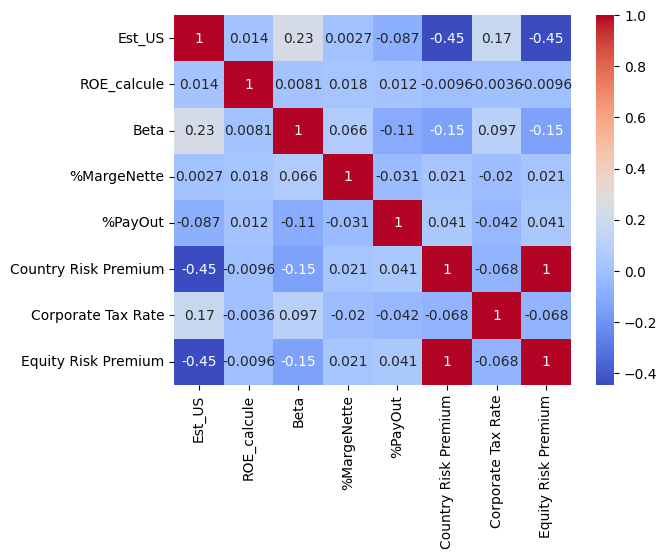

In [56]:
sns.heatmap(matrice_corr_2, annot=True, cmap='coolwarm')

On remarque une forte corrélation entre Country Risk Premium, Equity Risk Premium et Corporate Tax. On peut encore ajouter la variable annual volume traded 

In [57]:
print(df_fusion.columns)

Index(['Ticker', 'YahooTicker', 'Nom', 'Zone', 'AnneeFiscale', 'DateRapport',
       'Sector', 'Industry', 'Country', 'Beta', 'MarketCapitalizationBN',
       'SharesOutstandingMn', 'PER_calcule', 'ROE_calcule', 'ROA_calcule',
       'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
       'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
       'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
       '%Gearing', '%PayOut', 'Est_US', 'Equity Risk Premium',
       'Country Risk Premium', 'Corporate Tax Rate'],
      dtype='object')


Afin de choisir les variables de la régressions on va regarder la matrice de covariance entre toutes les variables du data frame 

In [58]:
#On étudie la corrélation entre toutes les variables
colonnes_reg_exp = [
    'AnneeFiscale', 'Beta', 'MarketCapitalizationBN',
    'SharesOutstandingMn', 'PER_calcule', 'ROE_calcule', 'ROA_calcule',
    'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
    'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
    'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
    '%Gearing', '%PayOut', 'Est_US', 
    'Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate'
]

matrice_corr_cols = df_fusion[colonnes_reg_exp].corr()


<Axes: >

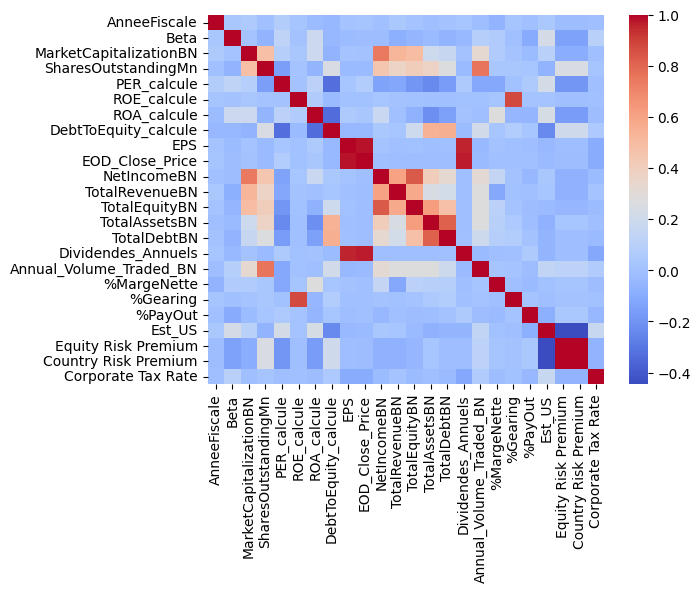

In [63]:
sns.heatmap(matrice_corr_cols, annot=False, cmap='coolwarm')

In [64]:

# --- Lancement de la seconde Régression Macro-Financière ---

import statsmodels.formula.api as smf

# On ajuste la formule à l'aide des observations concernant la multicolinéarité 
modele_formule_macro_3= """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%MargeNette") + 
              Q("%PayOut") + 
              Q("Country Risk Premium")+
              Annual_Volume_Traded_BN +
              MarketCapitalizationBN
"""

modele_macro_3 = smf.ols(formula=modele_formule_macro_3, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_macro_3.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     46.37
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           2.45e-70
Time:                        15:17:17   Log-Likelihood:                -10073.
No. Observations:                2707   AIC:                         2.016e+04
Df Residuals:                    2698   BIC:                         2.022e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [65]:

# --- Lancement de la seconde Régression Macro-Financière ---

import statsmodels.formula.api as smf

# On ajuste la formule à l'aide des observations concernant la multicolinéarité 
modele_formule_macro_3= """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%MargeNette") + 
              Q("%PayOut") + 
              Q("Country Risk Premium")+
              Annual_Volume_Traded_BN +
              MarketCapitalizationBN + 
              NetIncomeBN +
              TotalRevenueBN + 
              TotalEquityBN + 
              TotalAssetsBN + 
              TotalDebtBN + 
              EPS
"""

modele_macro_3 = smf.ols(formula=modele_formule_macro_3, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_macro_3.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     53.05
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          3.26e-131
Time:                        15:17:25   Log-Likelihood:                -9917.3
No. Observations:                2707   AIC:                         1.986e+04
Df Residuals:                    2692   BIC:                         1.995e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

## Section 2 : Analyses ciblées sur le S&P500 vs l'EuroStoxx600



QUEL OBJECTIF ?  

### A - Le S&P500

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [93]:
# Créons un data frame à partir du CSV 

chemin_fichier = 'data/df_sp500_clean.csv'
df_SP500 = pd.read_csv(chemin_fichier)
df_SP500.head()   




,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,NaN
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,5.276382
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,0.715990
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,5.213270
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,NaN


In [95]:
chemin_fichier_2 = 'data/country_risk_premiums.csv'
df_damodaran = pd.read_csv(chemin_fichier_2)
df_damodaran.head()

,Country,Adj. Default Spread,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate,Moody's rating
0,Abu Dhabi,0.49,4.99,0.66,15.00,Aa2
1,Albania,3.56,9.13,4.80,15.00,Ba3
2,Algeria,2.98,8.35,4.02,15.00,NR
3,Andorra (Principality of),1.58,6.46,2.13,18.98,Baa1
4,Angola,6.44,13.01,8.68,25.00,B3


In [96]:
# Nettoyage du DataFrame Damodaran
df_damodaran['Country'] = df_damodaran['Country'].str.strip()
df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) # Remplacer les multiples espaces par un seul

# Rendre la colonne 'Country' l'index pour faciliter la jointure
df_damodaran.set_index('Country', inplace=True) 


In [97]:
df_analyse_SP = df_SP500.drop("Croissance de l'EPS (en %)", axis = 1)
df_analyse_SP


,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.210,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.254,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.240,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.289,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,99.803,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,ZBRA,ZBRA,ZBRA,USA,2023,2023-12-31,Technology,Communication Equipment,United States,1.675,...,0.296,4.584,3.036,7.306,2.414,0.000,0.101166,6.457243,79.512516,0.000000
1497,ZBRA,ZBRA,ZBRA,USA,2024,2024-12-31,Technology,Communication Equipment,United States,1.675,...,0.528,4.981,3.586,7.968,2.362,0.000,0.089583,10.600281,65.867262,0.000000
1498,ZTS,ZTS,ZTS,USA,2022,2022-12-31,Healthcare,Drug Manufacturers - Specialty & Generic,United States,0.971,...,2.114,8.080,4.405,14.925,8.090,1.300,0.549233,26.163366,183.654938,28.824834
1499,ZTS,ZTS,ZTS,USA,2023,2023-12-31,Healthcare,Drug Manufacturers - Specialty & Generic,United States,0.971,...,2.344,8.544,4.997,14.286,6.755,1.500,0.485420,27.434457,135.181109,29.527559


In [98]:
df_fusion = pd.merge(
    df_analyse_SP, 
    df_damodaran, 
    left_on='Country', 
    right_index=True, 
    how='left' 
)

print("Nombre d'observations dans le data frame", len(df_fusion))

Nombre d'observations dans le data frame 1501


In [99]:
df_fusion.isna().sum().sum()

0

Le dataframe ne contient pas de na et contient toutes les observations du SP500. Commençons par regarder la corrélation entre les variables potentiellement utilisables


In [100]:
#Matrice  contenant les variables explicatives 

colonnes = [
    'AnneeFiscale', 'Beta', 'MarketCapitalizationBN',
    'SharesOutstandingMn', 'ROE_calcule', 'ROA_calcule',
    'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
    'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
    'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
    '%Gearing', '%PayOut', 'Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate'
]

matrice_corr_cols = df_fusion[colonnes].corr()


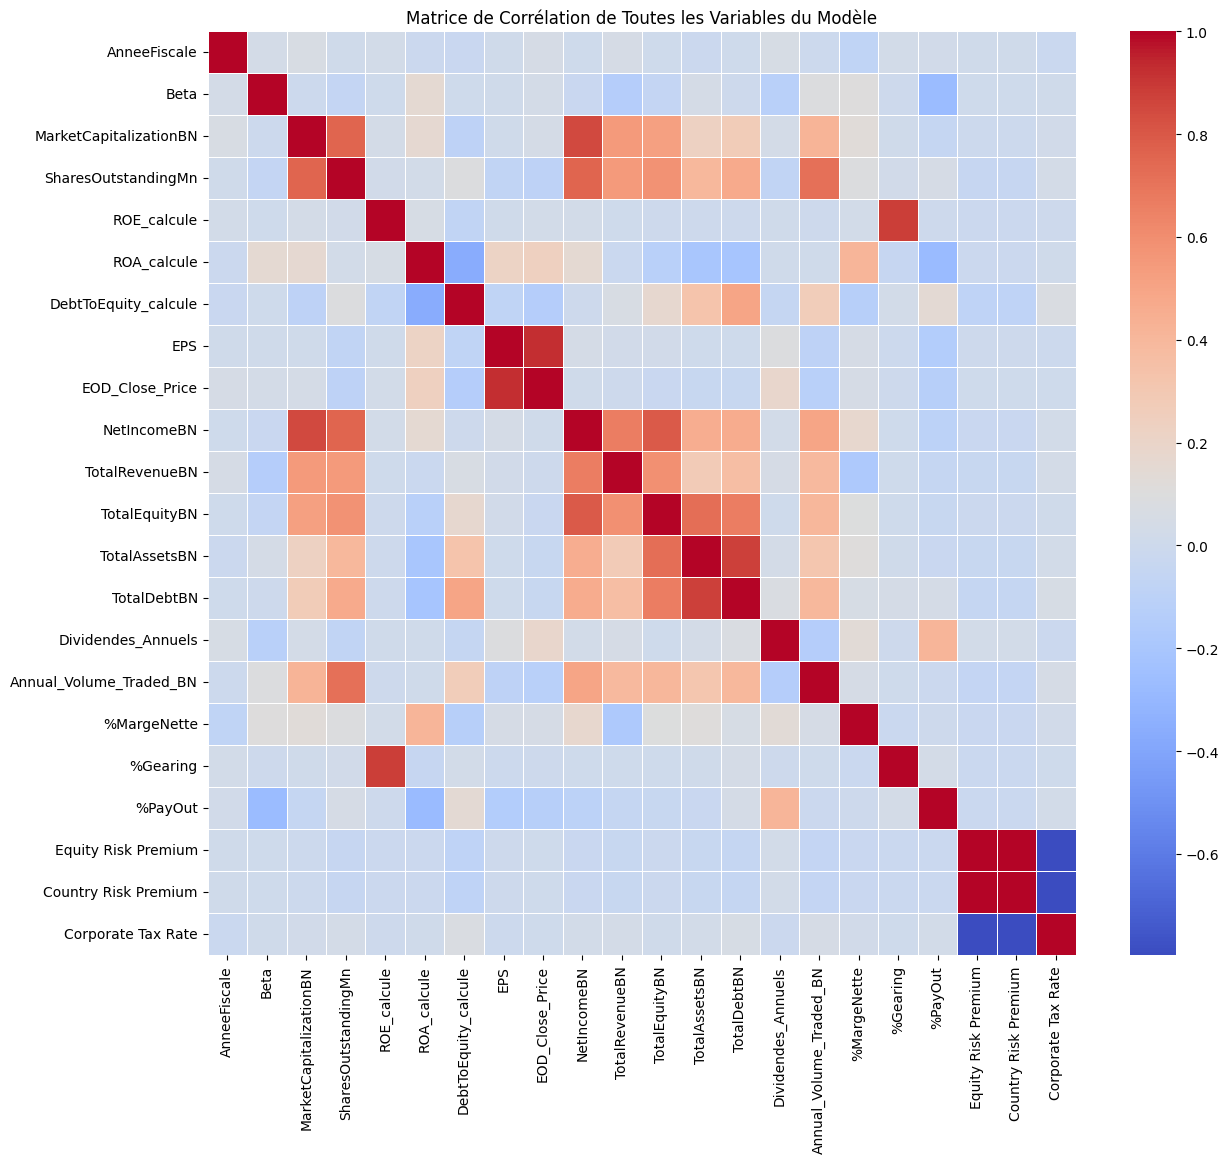

In [101]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(
    matrice_corr_cols, 
    annot=False,  
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5
)
plt.title('Matrice de Corrélation de Toutes les Variables du Modèle')
plt.show()

In [102]:
modele_1 = """
PER_calcule ~ Beta +
            MarketCapitalizationBN + 
            SharesOutstandingMn + 
            ROE_calcule + 
            ROA_calcule + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalEquityBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Dividendes_Annuels + 
            Annual_Volume_Traded_BN + 
            Q("%MargeNette") + 
            Q("%Gearing") +
            Q("%PayOut") 
"""

modele_1 = smf.ols(formula=modele_1, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_1.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     63.94
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          3.56e-170
Time:                        15:33:09   Log-Likelihood:                -5221.9
No. Observations:                1501   AIC:                         1.048e+04
Df Residuals:                    1482   BIC:                         1.058e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

Nous remarquons un problème de multicolinéarité. Nous avons déjà testé la corrélation avec la matrice de corrélation donc il faut calculer les VIF (Variation Inflation Factors) 


In [105]:
var_exp = [
    'AnneeFiscale', 'Beta', 'MarketCapitalizationBN',
    'SharesOutstandingMn', 'ROE_calcule', 'ROA_calcule',
    'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
    'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
    'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
    '%Gearing', '%PayOut'
]

In [109]:
#Création d'une variable X contenant toutes les variables explicatives utilisées dans le modèle
X = df_fusion[var_exp]

# 3. Ajouter une constante (obligatoire pour le calcul du VIF)
X = add_constant(X)

# 4. Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# 5. Afficher les résultats triés
print(vif_data.sort_values(by="VIF", ascending=False))

                   Variable           VIF
0                     const  3.627894e+06
10              NetIncomeBN  1.245195e+01
9           EOD_Close_Price  8.647035e+00
8                       EPS  8.210015e+00
12            TotalEquityBN  6.691919e+00
14              TotalDebtBN  6.565534e+00
13            TotalAssetsBN  6.362751e+00
3    MarketCapitalizationBN  6.347714e+00
4       SharesOutstandingMn  5.419019e+00
5               ROE_calcule  4.828275e+00
18                 %Gearing  4.815381e+00
16  Annual_Volume_Traded_BN  2.581645e+00
11           TotalRevenueBN  2.389339e+00
7      DebtToEquity_calcule  1.920746e+00
6               ROA_calcule  1.879973e+00
19                  %PayOut  1.611077e+00
15       Dividendes_Annuels  1.559380e+00
17              %MargeNette  1.535138e+00
2                      Beta  1.197173e+00
1              AnneeFiscale  1.036852e+00


On peut tester une autre regression linéaire en retirant les variables ayant une VIF trop élevée (c'est à dire pouvant être expliquées par d'autres variables). Le Net Income à la VIF la plus élevée car il peut être expliqué par une combinaison du revenu et de la marge nette

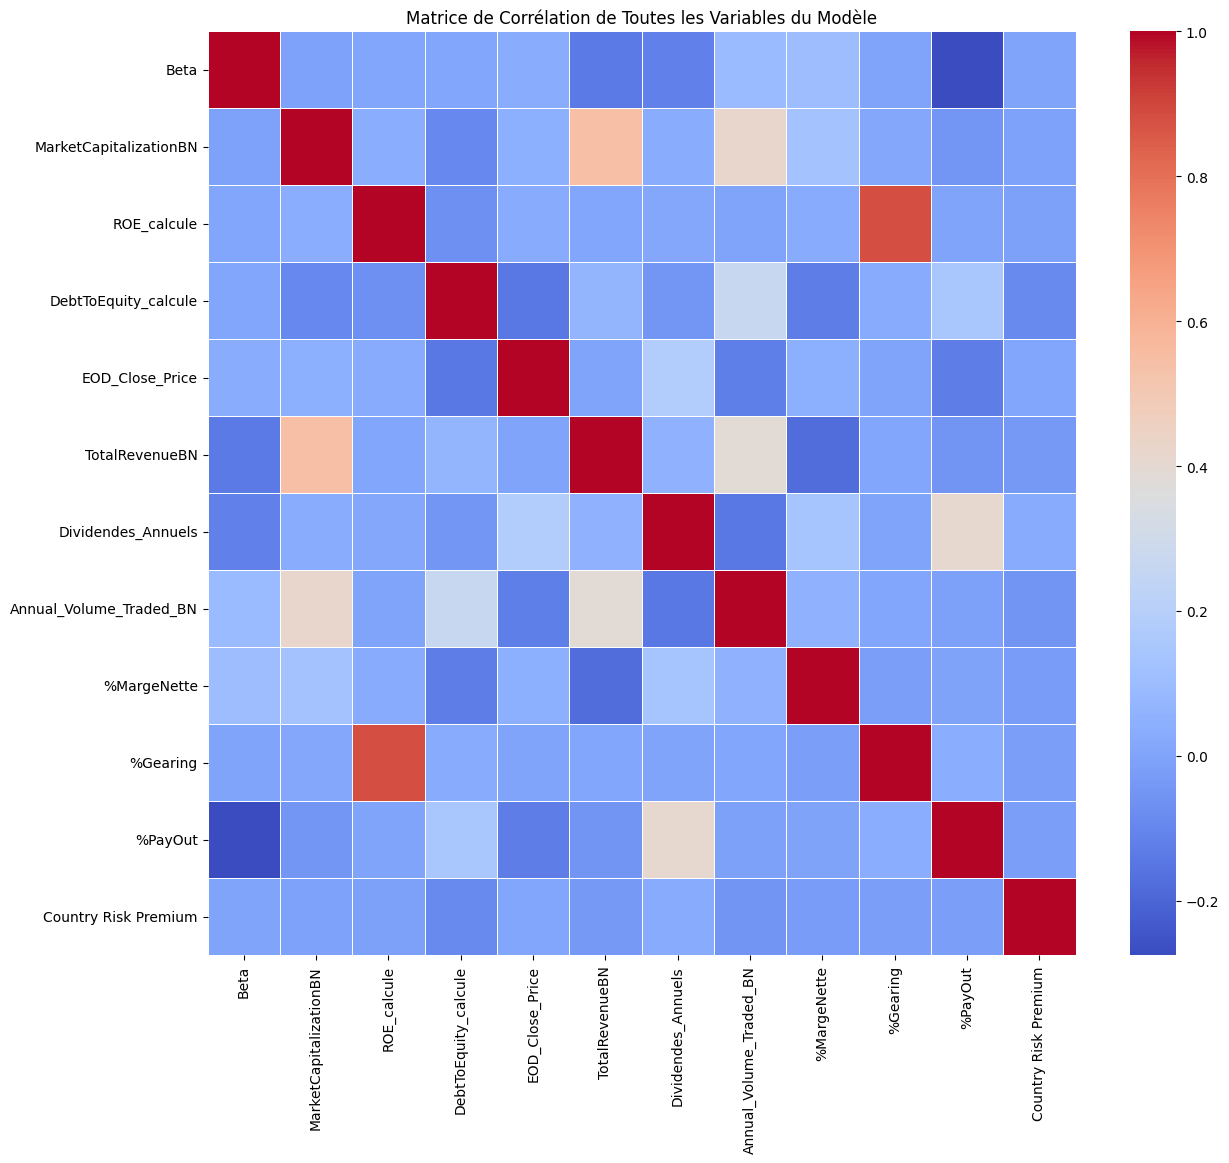

In [110]:
colonnes_finales = ['Beta', 'MarketCapitalizationBN',
    'ROE_calcule', 'DebtToEquity_calcule', 'EOD_Close_Price',
    'TotalRevenueBN', 'Dividendes_Annuels', 'Annual_Volume_Traded_BN', 
    '%MargeNette', '%Gearing', '%PayOut', 'Country Risk Premium'
]

matrice_corr_cols = df_fusion[colonnes_finales].corr()


plt.figure(figsize=(14, 12)) 
sns.heatmap(
    matrice_corr_cols, 
    annot=False,  
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5
)
plt.title('Matrice de Corrélation de Toutes les Variables du Modèle')
plt.show()

In [111]:

modele_2 = """
PER_calcule ~ Beta + 
            MarketCapitalizationBN + 
            ROE_calcule + 
            DebtToEquity_calcule +
            EOD_Close_Price +
            TotalRevenueBN + 
            Dividendes_Annuels + 
            Annual_Volume_Traded_BN + 
            Q("%MargeNette") + 
            Q("%PayOut")
"""

modele_2 = smf.ols(formula=modele_2, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_2.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     43.26
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.16e-75
Time:                        15:34:19   Log-Likelihood:                -5462.0
No. Observations:                1501   AIC:                         1.095e+04
Df Residuals:                    1490   BIC:                         1.100e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

On remarque que le R^2 est inférieur donc les variables utilisées expliquent moins la variable prédite, PER_calcule, même si l'on parvient à réduire le problème de multicollinéarité 

### B - L'EuroStoxx 600

In [112]:
chemin_fichier = 'data/df_eurostoxx_clean.csv'
df_STX600 = pd.read_csv(chemin_fichier)
df_STX600.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661,NaN
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952,NaN
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846,-0.952381
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296,-13.942308
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231,-32.402235


In [113]:
chemin_fichier_2 = 'data/country_risk_premiums.csv'
df_damodaran = pd.read_csv(chemin_fichier_2)
df_damodaran.head()

,Country,Adj. Default Spread,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate,Moody's rating
0,Abu Dhabi,0.49,4.99,0.66,15.00,Aa2
1,Albania,3.56,9.13,4.80,15.00,Ba3
2,Algeria,2.98,8.35,4.02,15.00,NR
3,Andorra (Principality of),1.58,6.46,2.13,18.98,Baa1
4,Angola,6.44,13.01,8.68,25.00,B3


In [114]:
# Nettoyage du DataFrame Damodaran
df_damodaran['Country'] = df_damodaran['Country'].str.strip()
df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) # Remplacer les multiples espaces par un seul

# Rendre la colonne 'Country' l'index pour faciliter la jointure
df_damodaran.set_index('Country', inplace=True) 

In [115]:
df_analyse_STX = df_STX600.drop("Croissance de l'EPS (en %)", axis = 1)
df_analyse_STX

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,1.616000,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.370022,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.367328,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.314950,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.212764,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,ZAL,ZAL.DE,Zalando SE,Eurostoxx,2024,2024-12-31,Consumer Cyclical,Internet Retail,Germany,1.849,...,0.251100,10.572500,2.665300,7.983900,1.725500,0.00,0.291167,2.375030,64.739429,0.000000
1202,ZURN,ZURN.SW,Zurich Insurance Group AG Ltd,Eurostoxx,2021,2021-12-31,Financial Services,Insurance - Diversified,Switzerland,0.388,...,5.202000,69.539000,29.121000,398.907000,15.109000,20.00,0.095858,7.480694,51.883520,57.159188
1203,ZURN,ZURN.SW,Zurich Insurance Group AG Ltd,Eurostoxx,2022,2022-12-31,Financial Services,Insurance - Diversified,Switzerland,0.388,...,3.964000,44.763000,25.683000,335.412000,15.715000,22.00,0.089025,8.855528,61.188335,82.366155
1204,ZURN,ZURN.SW,Zurich Insurance Group AG Ltd,Eurostoxx,2023,2023-12-31,Financial Services,Insurance - Diversified,Switzerland,0.388,...,4.351000,78.098000,24.860000,361.382000,15.455000,24.00,0.077463,5.571205,62.168142,80.106809


In [116]:
df_fusion = pd.merge(
    df_analyse_STX, 
    df_damodaran, 
    left_on='Country', 
    right_index=True, 
    how='left' 
)

print("Nombre d'observations dans le data frame", len(df_fusion))

Nombre d'observations dans le data frame 1206


In [117]:
#Vérification des données du data frame fusionné
df_fusion.isna().sum().sum()

0

Le dataframe ne contient pas de na et contient toutes les observations du SP500. Commençons par regarder la corrélation entre les variables potentiellement utilisables

In [118]:
#Matrice  contenant les variables explicatives 

colonnes = [
    'AnneeFiscale', 'Beta', 'MarketCapitalizationBN',
    'SharesOutstandingMn', 'ROE_calcule', 'ROA_calcule',
    'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
    'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
    'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
    '%Gearing', '%PayOut', 'Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate'
]

matrice_corr_cols = df_fusion[colonnes].corr()

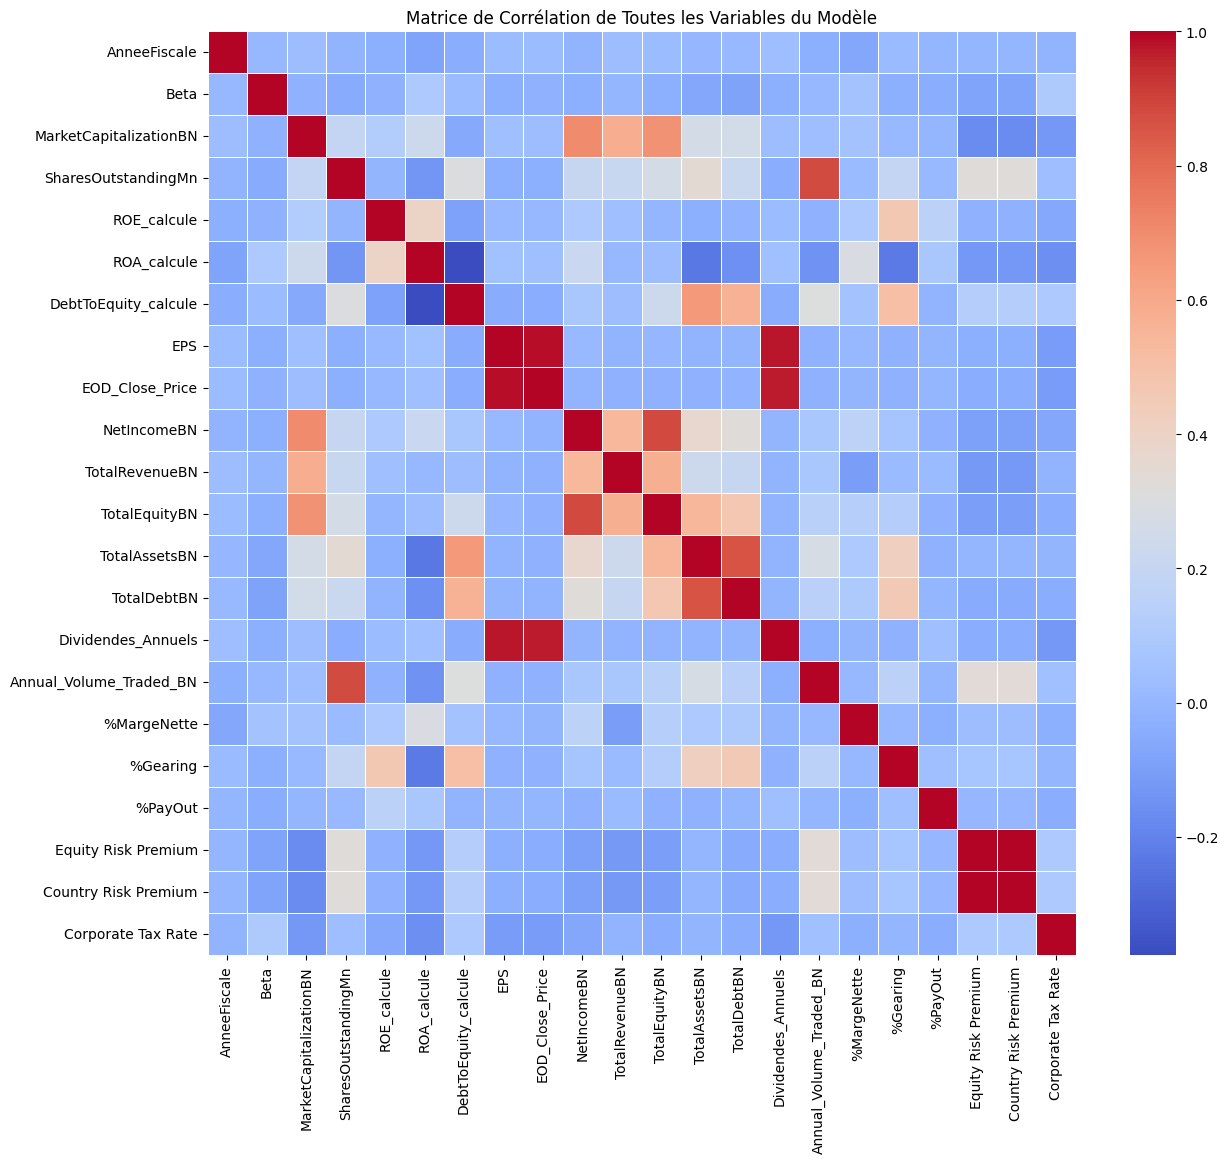

In [119]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(
    matrice_corr_cols, 
    annot=False,  
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5
)
plt.title('Matrice de Corrélation de Toutes les Variables du Modèle')
plt.show()

Par rapport à l'analyse menée pour le S&P500, les entreprises de l'Eurostoxx ne sont pas toutes dans le même pays, ce qui nous permet 

In [120]:
modele_1 = """
PER_calcule ~ Beta +
            AnneeFiscale + 
            MarketCapitalizationBN + 
            SharesOutstandingMn + 
            ROE_calcule + 
            ROA_calcule + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalEquityBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Dividendes_Annuels + 
            Annual_Volume_Traded_BN + 
            Q("%MargeNette") + 
            Q("%Gearing") +
            Q("%PayOut") + 
            Q("Equity Risk Premium") + 
            Q("Corporate Tax Rate")
"""

modele_1 = smf.ols(formula=modele_1, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_1.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     27.58
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           2.34e-87
Time:                        15:36:07   Log-Likelihood:                -4282.7
No. Observations:                1206   AIC:                             8609.
Df Residuals:                    1184   BIC:                             8722.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [ ]:
modele_2 = """
PER_calcule ~ Beta +
            AnneeFiscale + 
            MarketCapitalizationBN + 
            SharesOutstandingMn + 
            ROE_calcule + 
            ROA_calcule + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalEquityBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Dividendes_Annuels + 
            Annual_Volume_Traded_BN + 
            Q("%MargeNette") + 
            Q("%Gearing") +
            Q("%PayOut")
"""

modele_2 = smf.ols(formula=modele_2, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_2.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     29.89
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           4.02e-87
Time:                        18:20:24   Log-Likelihood:                -4286.9
No. Observations:                1206   AIC:                             8614.
Df Residuals:                    1186   BIC:                             8716.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

Conclusion : Les données financières expliquent mieux le PER des entreprises européennes que des entreprises américaines, qui semblent tirer une partie de leur valorisation de critères extra-financiers.

## Section 3 : Analyses par secteur

Pour affiner notre analyse, intéressons-nous maintenant aux différents secteurs.

In [75]:
chemin_fichier = 'data/df_eurostoxx_clean.csv'
df_eurostoxx_clean = pd.read_csv(chemin_fichier)
df_eurostoxx_clean.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661,NaN
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952,NaN
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846,-0.952381
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296,-13.942308
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231,-32.402235


In [76]:
chemin_fichier = 'data/df_sp500_clean.csv'
df_sp500_clean = pd.read_csv(chemin_fichier)
df_sp500_clean.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,NaN
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,5.276382
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,0.715990
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,5.213270
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,NaN


In [77]:
chemin_fichier_2 = 'data/country_risk_premiums.csv'
df_damodaran = pd.read_csv(chemin_fichier_2)
df_damodaran.head()

,Country,Adj. Default Spread,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate,Moody's rating
0,Abu Dhabi,0.49,4.99,0.66,15.00,Aa2
1,Albania,3.56,9.13,4.80,15.00,Ba3
2,Algeria,2.98,8.35,4.02,15.00,NR
3,Andorra (Principality of),1.58,6.46,2.13,18.98,Baa1
4,Angola,6.44,13.01,8.68,25.00,B3


In [78]:
df_analyse = pd.concat([df_sp500_clean,df_eurostoxx_clean], ignore_index = True)
df_analyse = df_analyse.drop("Croissance de l'EPS (en %)", axis = 1)
df_analyse.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.210,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.254,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.240,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.289,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,99.803,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748


In [79]:
df_analyse['Est_US'] = np.where(df_analyse['Zone'] == 'USA', 1, 0)
df_analyse.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Est_US
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,1
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,1
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,1
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,1
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,1


In [80]:
# Uniformisation des noms de pays dans les deux DataFrames

# On supprime les espaces invisibles et on remplace les doubles espaces par un seul 
df_analyse['Country'] = df_analyse['Country'].str.strip()
df_damodaran['Country'] = df_damodaran['Country'].str.strip()
df_analyse['Country'] = df_analyse['Country'].str.replace('\s+', ' ', regex=True)
df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) 

# Rendre la colonne 'Country' l'index pour faciliter la jointure
df_damodaran.set_index('Country', inplace=True) 

# Sélection des colonnes pertinentes
colonnes_marche = ['Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate']
df_damodaran = df_damodaran[colonnes_marche]

In [81]:
# Jointure et Nettoyage des NaN 

df_fusion = pd.merge(
    df_analyse, 
    df_damodaran, 
    left_on='Country', 
    right_index=True, 
    how='left' 
)
print(f"\nDataFrame après jointure et nettoyage des pays non trouvés : {len(df_fusion)} observations.")


DataFrame après jointure et nettoyage des pays non trouvés : 2707 observations.


In [82]:
df_fusion.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Est_US,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.729,0.776,0.407757,19.148599,50.640193,19.497487,1,4.33,0.0,25.0
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.769,1.065,0.427283,18.311916,52.196041,25.417661,1,4.33,0.0,25.0
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.735,0.911,0.461257,18.147227,46.792130,21.587678,1,4.33,0.0,25.0
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,3.390,0.956,0.431039,19.800307,57.477111,21.531532,1,4.33,0.0,25.0
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,132.480,0.910,22.065504,25.309641,261.446164,14.796748,1,4.33,0.0,25.0


Regardons le nombre d'occurences de chaque secteur dans le data frame 

In [83]:
print(df_fusion['Sector'].value_counts())

Sector
Industrials               525
Financial Services        484
Healthcare                276
Consumer Cyclical         271
Technology                248
Consumer Defensive        204
Basic Materials           177
Utilities                 166
Real Estate               124
Energy                    120
Communication Services    112
Name: count, dtype: int64


Croisons en suite avec l'indice - Eurostoxx ou S&P500

In [84]:
tableau_repartition = pd.crosstab(df_fusion['Zone'], df_fusion['Sector'])
print(tableau_repartition)

Sector     Basic Materials  Communication Services  Consumer Cyclical  \
Zone                                                                    
Eurostoxx              112                      65                110   
USA                     65                      47                161   

Sector     Consumer Defensive  Energy  Financial Services  Healthcare  \
Zone                                                                    
Eurostoxx                  95      42                 241         109   
USA                       109      78                 243         167   

Sector     Industrials  Real Estate  Technology  Utilities  
Zone                                                        
Eurostoxx          275           43          59         55  
USA                250           81         189        111  


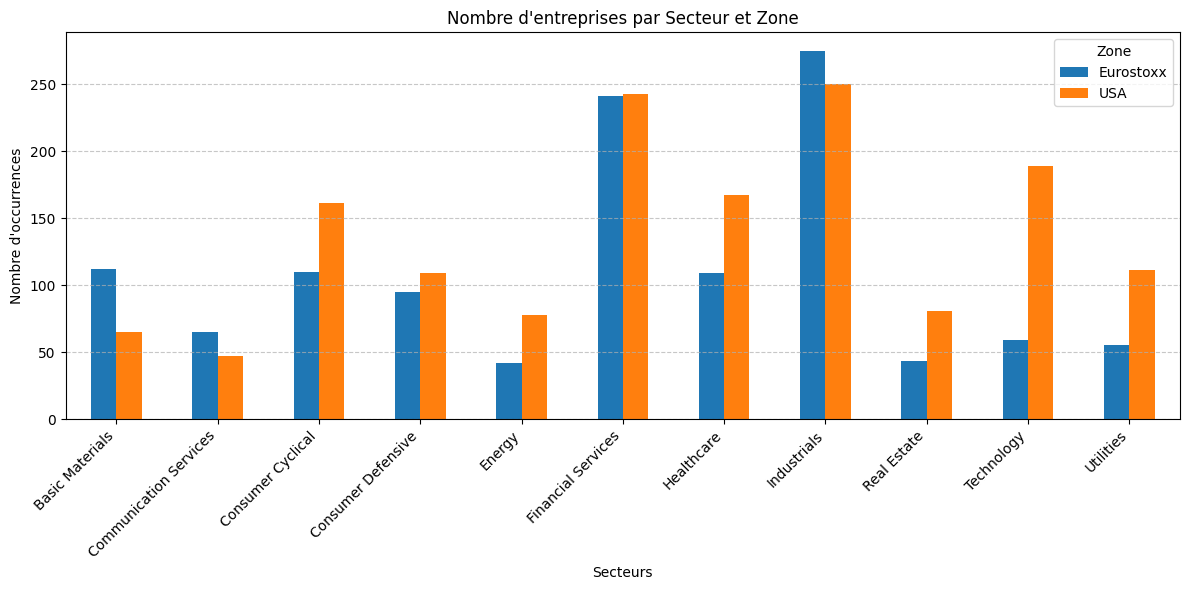

In [85]:
import matplotlib.pyplot as plt

# On transpose (.T) pour avoir les secteurs sur l'axe X
tableau_repartition.T.plot(kind='bar', figsize=(12, 6))

plt.title('Nombre d\'entreprises par Secteur et Zone')
plt.ylabel('Nombre d\'occurrences')
plt.xlabel('Secteurs')
plt.xticks(rotation=45, ha='right') # Incliner les noms pour la lisibilité
plt.legend(title='Zone')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

On remarque que les secteurs sont représentés différements entre l'Eurostoxx et le S&P500, cette différence de secteurs entre les deux dataframe peut expliquer l'écart de valorisation, il convient donc de vérifier l'impact des secteurs sur le PER. 

Calculons donc le PER moyen et médian par zone, puis par secteur et enfin par secteur et par zone. 

In [86]:
# Calcul du PER moyen et médian par zone
stats_PER_zones = df_fusion.groupby('Zone')['PER_calcule'].agg(['mean', 'median', 'std', 'count'])
print(stats_PER_zones)

                mean     median        std  count
Zone                                             
Eurostoxx  16.851638  14.876592  10.296036   1206
USA        21.692491  20.224630  10.461659   1501


In [87]:
stats_PER_secteurs = df_fusion.groupby('Sector')['PER_calcule'].agg(['mean', 'median', 'std', 'count'])
print(stats_PER_secteurs)

                             mean     median        std  count
Sector                                                        
Basic Materials         19.232735  16.194048  12.661276    177
Communication Services  16.354526  14.239095  10.557779    112
Consumer Cyclical       20.108634  18.530967  11.169789    271
Consumer Defensive      21.775417  20.484600   9.239552    204
Energy                  11.785255   9.749673   7.401910    120
Financial Services      13.657542  10.787552   9.202762    484
Healthcare              25.097227  23.961461  10.205732    276
Industrials             21.034314  20.011627   9.271335    525
Real Estate             22.952151  23.651138  11.176791    124
Technology              24.195053  23.482588  10.494867    248
Utilities               17.561499  17.442818   7.347621    166


In [88]:
stats_PER_secteurs_zones = df_fusion.groupby(['Sector','Zone'])['PER_calcule'].agg(['mean', 'median', 'std', 'count'])
print(stats_PER_secteurs_zones)

                                       mean     median        std  count
Sector                 Zone                                             
Basic Materials        Eurostoxx  17.681728  15.110441  12.096869    112
                       USA        21.905240  21.245377  13.250834     65
Communication Services Eurostoxx  13.051904  12.137833   7.721671     65
                       USA        20.921982  15.073526  12.218466     47
Consumer Cyclical      Eurostoxx  19.121552  17.165120  11.776303    110
                       USA        20.783037  19.625654  10.720794    161
Consumer Defensive     Eurostoxx  21.418606  19.226168   9.715074     95
                       USA        22.086400  21.362246   8.837717    109
Energy                 Eurostoxx   9.525776   6.967895   7.190091     42
                       USA        13.001897  11.920628   7.270590     78
Financial Services     Eurostoxx  10.119090   7.894312   6.854131    241
                       USA        17.166871  13.515

On remarque que les secteurs les plus représentés dans l'Eurostoxx ont des PER plus faibles, notamment : Financial Services (241). 
Les entreprises de l'Eurostoxx ont quand même un PER inférieur en moyenne que les entreprises du S&P500. 

On peut tenter de valider l'hypothèse de l'impact du mix sectoriel sur la valorisation par une régression linéaire simple à laquelle on ajoutera les autres variables explicatives 

In [89]:
formule_test = "PER_calcule ~ C(Zone) + C(Sector)"

modele_test = smf.ols(formula=formule_test, data=df_fusion).fit()
print(modele_test.summary())

                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     54.76
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          9.91e-110
Time:                        15:27:52   Log-Likelihood:                -9974.0
No. Observations:                2707   AIC:                         1.997e+04
Df Residuals:                    2695   BIC:                         2.004e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

On peut ajouter aux secteurs quelques données opérationnells et de marché pour tester une première regression en évitant d'augmenter les effets de multicollinéarité 

In [90]:
formule_test = """PER_calcule ~ C(Zone) + C(Sector) + Q("Equity Risk Premium") + Beta + AnneeFiscale + MarketCapitalizationBN + EPS +Q("%MargeNette") + EOD_Close_Price + NetIncomeBN
"""

modele_test = smf.ols(formula=formule_test, data=df_fusion).fit()
print(modele_test.summary())

                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     52.94
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          1.64e-169
Time:                        15:27:52   Log-Likelihood:                -9816.7
No. Observations:                2707   AIC:                         1.967e+04
Df Residuals:                    2687   BIC:                         1.979e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Les réferences de cette regression sont "Basic Materials" et "Eurostoxx". Tentons d'ajouter les autres variables explicatives 

formule_test = """PER_calcule ~ 
            C(Zone) + 
            C(Sector) + 
            Beta +
            AnneeFiscale + 
            MarketCapitalizationBN + 
            SharesOutstandingMn + 
            ROE_calcule + 
            ROA_calcule + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalEquityBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Dividendes_Annuels + 
            Annual_Volume_Traded_BN + 
            Q("%MargeNette") + 
            Q("%Gearing") +
            Q("%PayOut") + 
            Q("Equity Risk Premium")
"""

modele_test = smf.ols(formula=formule_test, data=df_fusion).fit()
print(modele_test.summary())

In [91]:
formule_test = """PER_calcule ~ 
            C(Zone) + 
            C(Sector) + 
            Beta +
            AnneeFiscale + 
            MarketCapitalizationBN + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalEquityBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Q("%MargeNette") + 
            Q("%PayOut") + 
            Q("Equity Risk Premium")
"""

modele_test = smf.ols(formula=formule_test, data=df_fusion).fit()
print(modele_test.summary())

                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     53.67
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          1.39e-214
Time:                        15:27:52   Log-Likelihood:                -9697.8
No. Observations:                2707   AIC:                         1.945e+04
Df Residuals:                    2681   BIC:                         1.960e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [92]:
import numpy as np

# Création de la version Log pour la taille
df_fusion['log_MarketCap'] = np.log(df_fusion['MarketCapitalizationBN'])

formule_optimisee = """
PER_calcule ~ C(Zone) + 
            C(Sector) + 
            Beta +
            AnneeFiscale + 
            log_MarketCap + 
            ROE_calcule + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Q("%MargeNette") + 
            Q("%Gearing") +
            Q("%PayOut") 
"""

modele_final = smf.ols(formula=formule_optimisee, data=df_fusion).fit()
print(modele_final.summary())

                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     54.62
Date:                Tue, 23 Dec 2025   Prob (F-statistic):          5.72e-218
Time:                        15:27:52   Log-Likelihood:                -9689.8
No. Observations:                2707   AIC:                         1.943e+04
Df Residuals:                    2681   BIC:                         1.959e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In